In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3),'figure.dpi':120})

from google.colab import files
updated = files.upload()
df = pd.read_csv('Data_Lesson1_ab_Startups.csv')
df.head(5)

,No.,Profit,RnD,Adm,Marketing
0,1,192,165,137,472
1,2,192,163,151,444
2,3,191,153,101,408
3,4,183,144,119,383
4,5,166,142,91,366


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   No.        44 non-null     int64
 1   Profit     44 non-null     int64
 2   RnD        44 non-null     int64
 3   Adm        44 non-null     int64
 4   Marketing  44 non-null     int64
dtypes: int64(5)
memory usage: 1.8 KB


In [68]:
df.describe()

,No.,Profit,RnD,Adm,Marketing
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,121.045455,83.227273,122.090909,231.409091
std,12.845233,33.271927,40.267630,27.446200,109.308464
min,1.000000,70.000000,16.000000,51.000000,0.000000
25%,11.750000,97.000000,59.500000,102.500000,146.250000
50%,22.500000,110.500000,76.500000,123.000000,239.500000
75%,33.250000,144.500000,116.250000,145.250000,303.500000
max,44.000000,192.000000,165.000000,183.000000,472.000000


In [163]:
df = df.drop(['No.'],axis='columns')

KeyError: ignored

In [164]:
df.isnull().sum()

Profit       0
RnD          0
Adm          0
Marketing    0
Target       0
dtype: int64

In [168]:
x = df.drop(['Profit'],axis='columns')
y = df['Profit'].values

In [166]:
df = df.drop(['Target'],axis='columns')

In [169]:
x

,RnD,Adm,Marketing
0,165,137,472
1,163,151,444
2,153,101,408
3,144,119,383
4,142,91,366
5,132,100,363
6,135,147,128
7,130,146,324
8,121,149,312
9,123,109,305


In [170]:
y

array([192, 192, 191, 183, 166, 157, 156, 156, 152, 150, 146, 144, 142,
       134, 133, 130, 127, 125, 124, 123, 118, 111, 110, 109, 109, 107,
       106, 105, 103, 101, 100,  97,  97,  97,  97,  96,  91,  90,  81,
        81,  78,  78,  71,  70])

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 43, test_size=0.2)

In [176]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth=15)
model_tree.fit(x_train, y_train)
y_predict = model_tree.predict(x_test)
y_predict

array([146,  97, 130, 146,  78, 142, 101, 191, 130])

In [177]:
y_test

array([156,  97, 133, 106,  81, 134, 103, 157, 156])

In [178]:
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

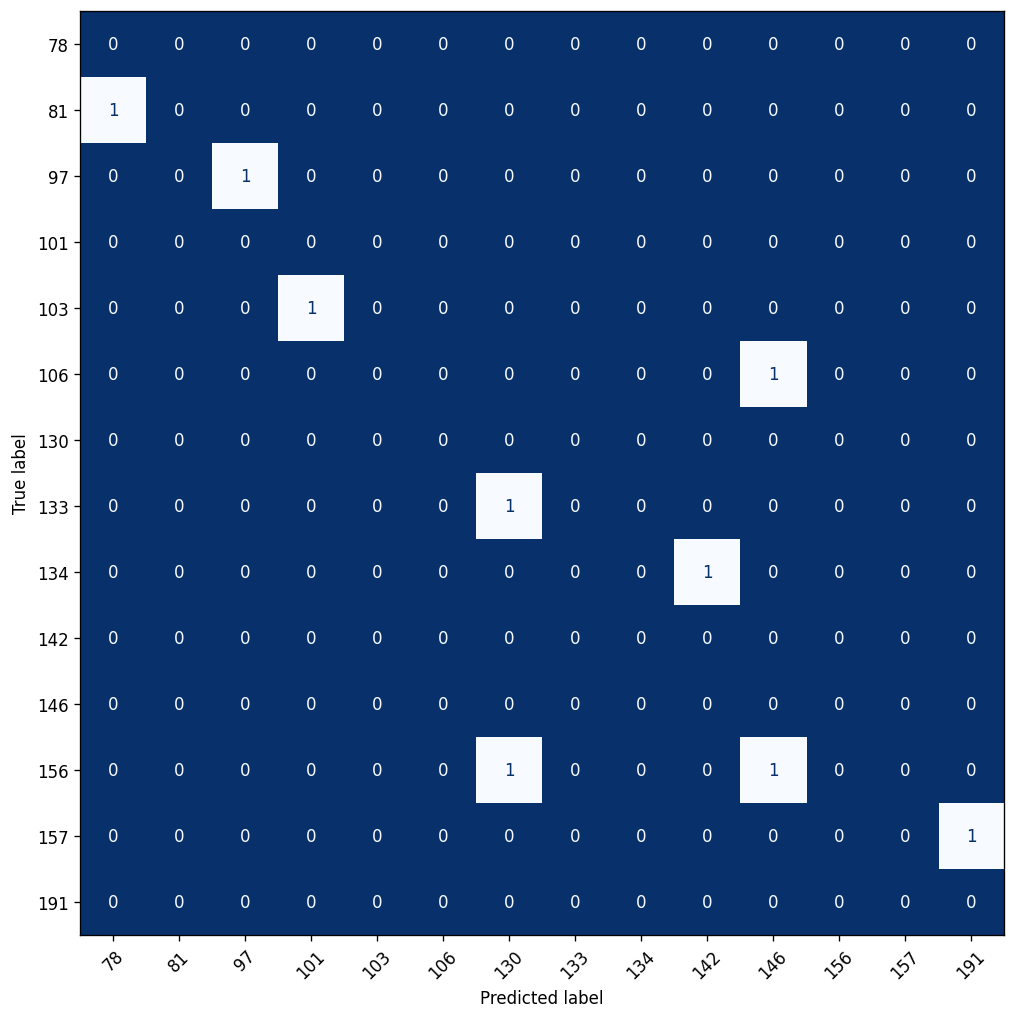

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (20,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, colorbar = False, cmap = 'Blues_r',xticks_rotation=45)

In [180]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy_score(y_test, y_predict)

0.1111111111111111

In [181]:
from sklearn.ensemble import RandomForestClassifier
score_total=[]# Lựa chọn n_estimators phù hợp cho RF
for i in range(2,20,1):
  model_rf = RandomForestClassifier(n_estimators=i,random_state=1,max_samples=0.7)
  model_rf.fit(x_train, y_train)
  score = model_rf.score(x_test, y_test)
  score_total.append([score])

In [182]:
score_total

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111],
 [0.1111111111111111]]

In [183]:
model_rf = RandomForestClassifier(n_estimators=3,random_state=1,max_samples=0.7) #số lượng các cây quyết định được sử dụng trong mô hình/ và số lượng data dùng cho DT
model_rf.fit(x_train, y_train)
score = model_rf.score(x_test, y_test)

In [184]:
score

0.0

In [185]:
y_predictRF = model_rf.predict(x_test)
y_predictRF

array([107, 101, 101, 107,  71, 110, 101, 109, 152])

In [186]:
accuracy_score(y_test, y_predictRF)

0.0